*   Nama: Agus Syahril Mubarok
*   Kelas: Belajar Machine Learning untuk Permula
*   Proyek Akhir: Klasifikasi Gambar

In [3]:
import tensorflow as tf

In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-24 15:47:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.27MB/s    in 3m 12s  

2021-04-24 15:50:57 (1.60 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [5]:
#ekstraksi file rockpaperscissors.zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [6]:
#menetapkan base_dir
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [7]:
#augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.4)

In [16]:
#membagi dataset ke train dan validation data 
train_generator = train_val_datagen.flow_from_directory(
        base_dir,
        subset='training',
        target_size=(100, 150),
        batch_size=4,
        class_mode='sparse')
 
validation_generator = train_val_datagen.flow_from_directory(
        base_dir,
        subset='validation',
        target_size=(100, 150),
        batch_size=4,
        class_mode='sparse')


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [17]:
#build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [18]:
# compile model dengan 'adam' optimizer loss function 'sparse_categorical_crossentropy' 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [19]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=30, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/30
25/25 - 5s - loss: 1.1178 - accuracy: 0.3163 - val_loss: 1.0779 - val_accuracy: 0.4500
Epoch 2/30
25/25 - 4s - loss: 1.1092 - accuracy: 0.3400 - val_loss: 1.1040 - val_accuracy: 0.2500
Epoch 3/30
25/25 - 4s - loss: 1.0998 - accuracy: 0.4100 - val_loss: 1.1606 - val_accuracy: 0.2500
Epoch 4/30
25/25 - 4s - loss: 1.1034 - accuracy: 0.3600 - val_loss: 1.0924 - val_accuracy: 0.3500
Epoch 5/30
25/25 - 4s - loss: 1.1193 - accuracy: 0.4000 - val_loss: 1.0953 - val_accuracy: 0.2000
Epoch 6/30
25/25 - 4s - loss: 1.0999 - accuracy: 0.3400 - val_loss: 1.1066 - val_accuracy: 0.1500
Epoch 7/30
25/25 - 4s - loss: 1.0665 - accuracy: 0.3800 - val_loss: 0.9796 - val_accuracy: 0.4500
Epoch 8/30
25/25 - 4s - loss: 1.1234 - accuracy: 0.3100 - val_loss: 1.0913 - val_accuracy: 0.4500
Epoch 9/30
25/25 - 4s - loss: 1.0885 - accuracy: 0.3900 - val_loss: 1.0856 - val_accuracy: 0.3500
Epoch 10/30
25/25 - 4s - loss: 0.9261 - accuracy: 0.5600 - val_loss: 0.8147 - val_accuracy: 0.6500
Epoch 11/30
25/25 -

Saving 0Ug54ifXRqqlZS2Z.png to 0Ug54ifXRqqlZS2Z.png
0Ug54ifXRqqlZS2Z.png
Gunting


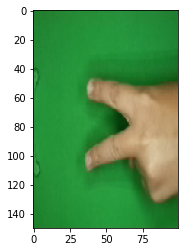

In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if (classes[0][0] == 1) :
    print("Kertas")
  elif (classes[0][1] == 1) :
    print("Batu")
  elif (classes[0][2] == 1) :
    print("Gunting")